<a href="https://colab.research.google.com/github/FaustoJuarez/Data-Science-Journey/blob/main/RiverFlowLevels_Neural_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.1 MB/s 
     |████████████████████████████████| 1.6 MB 11.7 MB/s 


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet
import pickle


In [4]:
df = pd.read_csv('rivers_merged1-date.csv')
df.head()

,YEAR,DOY,WS10M_MIN,WS10M_MAX,WS2M_MIN,WS2M_MAX,PS,T2M,TS,RH2M,T2M_RANGE,QV2M,PRECTOTCORR,T2MDEW,T2MWET,T2M_MIN,T2M_MAX,DATE
0,2000,1,0.71,5.98,0.45,4.38,91.34,22.93,22.75,51.94,11.90,9.64,1.14,12.03,17.48,17.00,28.89,01-01-2000
1,2000,2,0.43,4.66,0.19,3.45,91.27,23.31,23.73,52.62,12.09,9.89,1.36,12.36,17.83,17.59,29.68,01-02-2000
2,2000,3,0.34,5.37,0.25,3.97,91.02,23.25,23.59,53.69,13.34,10.07,8.61,12.51,17.87,16.28,29.62,01-03-2000
3,2000,4,0.30,4.49,0.16,3.38,91.12,23.72,24.30,56.31,11.98,10.80,3.46,13.69,18.70,17.45,29.43,01-04-2000
4,2000,5,1.01,4.19,0.60,3.16,91.12,25.72,25.60,48.00,13.35,10.44,0.26,13.19,19.45,18.57,31.92,01-05-2000


In [6]:
df.dtypes


YEAR             int64
DOY              int64
WS10M_MIN      float64
WS10M_MAX      float64
WS2M_MIN       float64
WS2M_MAX       float64
PS             float64
T2M            float64
TS             float64
RH2M           float64
T2M_RANGE      float64
QV2M           float64
PRECTOTCORR    float64
T2MDEW         float64
T2MWET         float64
T2M_MIN        float64
T2M_MAX        float64
DATE            object
dtype: object

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [10]:
df.dtypes

YEAR                    int64
DOY                     int64
WS10M_MIN             float64
WS10M_MAX             float64
WS2M_MIN              float64
WS2M_MAX              float64
PS                    float64
T2M                   float64
TS                    float64
RH2M                  float64
T2M_RANGE             float64
QV2M                  float64
PRECTOTCORR           float64
T2MDEW                float64
T2MWET                float64
T2M_MIN               float64
T2M_MAX               float64
DATE           datetime64[ns]
dtype: object

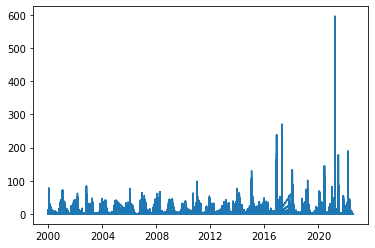

In [11]:
plt.plot(df['DATE'], df['PRECTOTCORR'])
plt.show()

In [12]:
data = df[['DATE','PRECTOTCORR']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
0,2000-01-01,1.14
1,2000-01-02,1.36
2,2000-01-03,8.61
3,2000-01-04,3.46
4,2000-01-05,0.26


In [22]:
#train data from 2000 - 2008 (:39451) test data from 2008 to 2016 (39452:78904)

train = data.iloc[:39451]
test = data.iloc[39451:76000] 

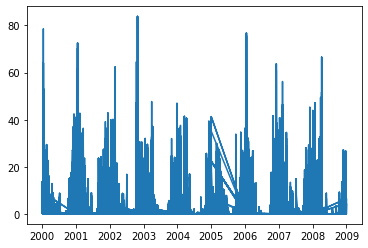

In [18]:
plt.plot(train['ds'], train['y'])
plt.show()


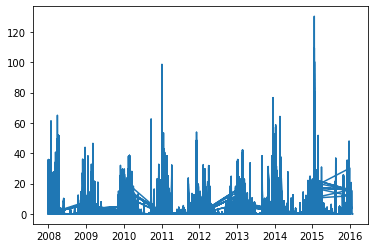

In [23]:
plt.plot(test['ds'], test['y'])
plt.show()

## Train Model

In [31]:
m = NeuralProphet()


In [27]:
train = train.drop_duplicates(subset='ds')

In [32]:
metrics = m.fit(train, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.97% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.97% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 137
INFO:NP.config:Auto-set epochs to 137


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.51E-02, min: 9.19E-01
INFO:NP.utils_torch:lr-range-test results: steep: 9.51E-02, min: 9.19E-01


  0%|          | 0/138 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.51E-02, min: 1.45E+00
INFO:NP.utils_torch:lr-range-test results: steep: 9.51E-02, min: 1.45E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.67E-02
INFO:NP.forecaster:lr-range-test selected learning rate: 9.67E-02
Epoch[137/137]: 100%|██████████| 137/137 [00:32<00:00,  4.17it/s, SmoothL1Loss=0.0665, MAE=2.52, RMSE=4.85, RegLoss=0]


## Forecast model


In [33]:
predicted = m.predict(train)
forecast = m.predict(train)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.97% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.97% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.97% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.97% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.97% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.97% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - 

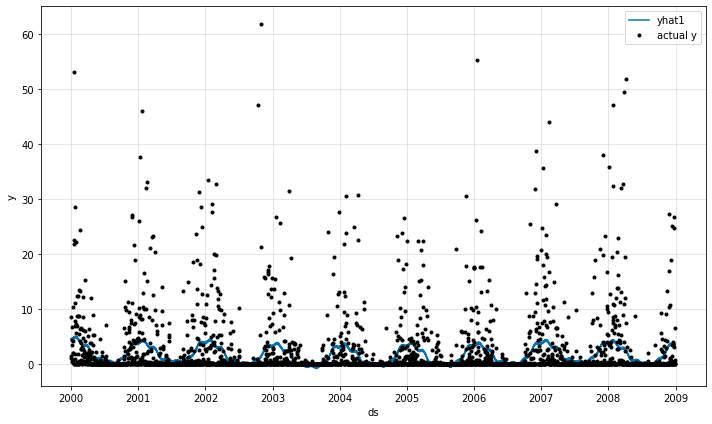

In [34]:
forecasts_plot = m.plot(forecast)

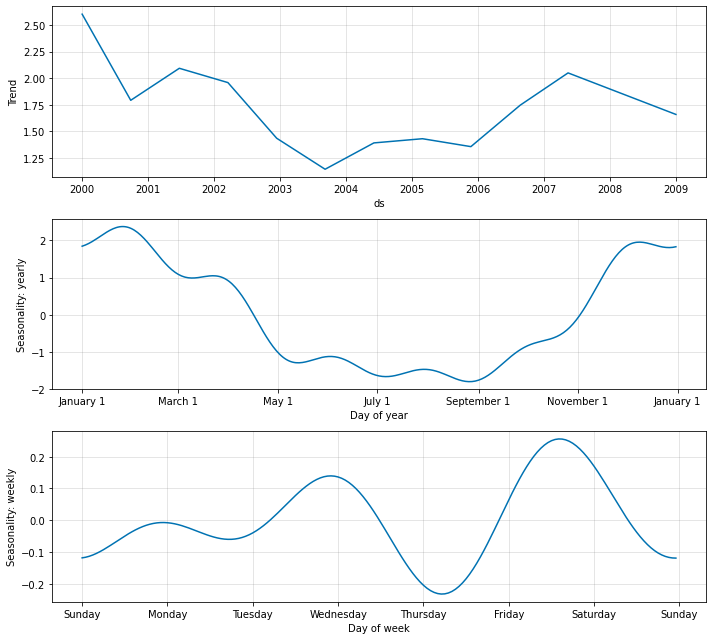

In [35]:
fig_comp = m.plot_components(forecast)

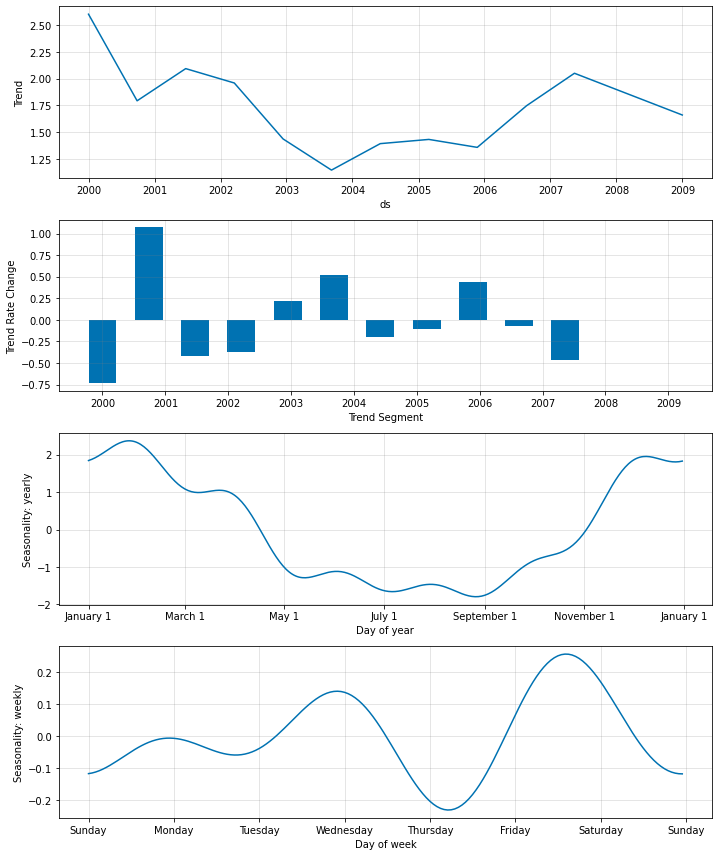

In [36]:
fig_param = m.plot_parameters()

##Validation

In [39]:
data = data.drop_duplicates(subset='ds')

In [40]:
df_train, df_test = m.split_df(data, valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D


In [42]:
test_metrics = m.test(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.939% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.939% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.108  3.014 10.365
INFO:NP.forecaster:Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.108  3.014 10.365


In [44]:
metrics = m.fit(data, validation_df=df_test)

ERROR - (NP.forecaster.fit) - Model has already been fitted. Re-fitting may break or produce different results.
ERROR:NP.forecaster:Model has already been fitted. Re-fitting may break or produce different results.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D


TypeError: ignored